
# classification



In [ ]:

from sklearn.datasets import make_circles

n_samples = 1000
x, y = make_circles(n_samples,
                    noise=0.04,
                    random_state = 42)
# x, y

In [ ]:
import pandas as pd

circles = pd.DataFrame({"X1":x[:,0],
                        "X2":x[:,0],
                        "label":y
                        })
circles.head(100)


,X1,X2,label
0,0.748227,0.748227,1
1,-0.745096,-0.745096,1
2,-0.822625,-0.822625,1
3,-0.411433,-0.411433,1
4,0.443905,0.443905,0
...,...,...,...
95,0.708998,0.708998,0
96,-0.801572,-0.801572,1
97,0.391009,0.391009,0
98,0.641689,0.641689,0


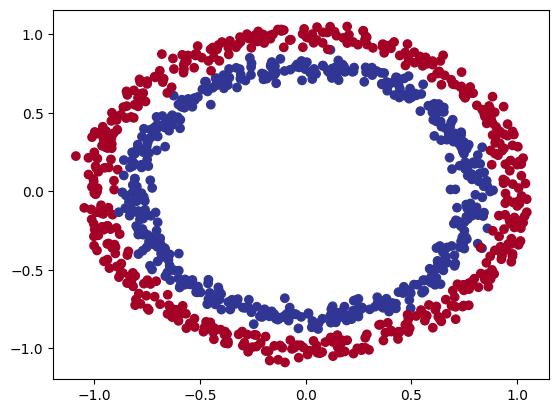

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=x[:, 0],
            y=x[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)


In [ ]:
import torch

In [ ]:
""" we don't need to convert this to tensor cuz it already was."""

# x = torch.from_numpy(x).type(torch.float)
# y = torch.from_numpy(y).type(torch.float)


" we don't need to convert this to tensor cuz it already was."

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)


In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class CircleModel0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=100)
    self.layer_2 = nn.Linear(in_features=100, out_features=1)

  def foward(self, x):
    return self.layer_2(self.layer)

model_0 = CircleModel0().to(device)
model_0

CircleModel0(
  (layer_1): Linear(in_features=2, out_features=100, bias=True)
  (layer_2): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=30),
    nn.Linear(in_features=30, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=30, bias=True)
  (1): Linear(in_features=30, out_features=1, bias=True)
)

In [ ]:
# model_0.state_dict()

In [ ]:
x_test = torch.from_numpy(X_test).float().squeeze()
x_train = torch.from_numpy(X_train).float().squeeze()
y_train = torch.from_numpy(y_train).float().squeeze()

In [ ]:
x_test.dtype

torch.float32

In [ ]:
print(next(model_0.parameters()).dtype)

torch.float32


In [ ]:
untrained_pred = model_0(x_test.to(device))

In [ ]:
# model_0.state_dict()

In [ ]:
# print(untrained_pred)

In [ ]:
print(untrained_pred.shape)
print(x_test.shape)


torch.Size([200, 1])
torch.Size([200, 2])


In [ ]:
with torch.inference_mode():
  untrained_preds = model_0(x_test.to(device))

In [ ]:
# untrained_pred

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1
)


In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc


In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(x_test.to(device))[:5]
y_logits

tensor([[-0.1317],
        [-0.3042],
        [ 0.4044],
        [-0.2926],
        [ 0.5493]])

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4671],
        [0.4245],
        [0.5998],
        [0.4274],
        [0.6340]])

In [ ]:

y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(x_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze()


tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

torch.manual_seed(42)

epochs = 500

for epoch in range(epochs):
    model_0.train()
    y_logits = model_0(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train.float().squeeze())
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # Convert y_test to a PyTorch tensor
        y_test_tensor = torch.from_numpy(y_test).float()

        test_loss = loss_fn(test_logits, y_test_tensor)
        test_acc = accuracy_fn(y_true=y_test_tensor, y_pred=test_pred)


In [ ]:
y_test[:5]

array([1, 0, 1, 0, 1])

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

torch.manual_seed(42)

epochs = 5000


for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits
                  ,y_train.float().squeeze())
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    y_test_tensor = torch.from_numpy(y_test).float()

    test_loss = loss_fn(test_logits, y_test_tensor)
    test_acc = accuracy_fn(y_true=y_test_tensor ,y_pred=test_pred)

  if epoch % 50 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69467, Test acc: 45.50%
Epoch: 50 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69467, Test acc: 45.50%
Epoch: 100 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69467, Test acc: 45.50%
Epoch: 150 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69467, Test acc: 45.50%
Epoch: 200 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69467, Test acc: 45.50%
Epoch: 250 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69467, Test acc: 45.50%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69467, Test acc: 45.50%
Epoch: 350 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69467, Test acc: 45.50%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69467, Test acc: 45.50%
Epoch: 450 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69467, Test acc: 45.50%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69467, Test acc: 45.50%
Epoch: 550 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69467, Test acc: 45

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
x_test, y_test = x_test.to(device), torch.from_numpy(y_test).to(device).float()

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

epochs = 5000

x_train, y_train = x_train.to(device), y_train.to(device)


for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits.float(),
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    # if epoch % 100 == 0:
      # print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


helper_functions.py already exists, skipping download


In [ ]:

import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


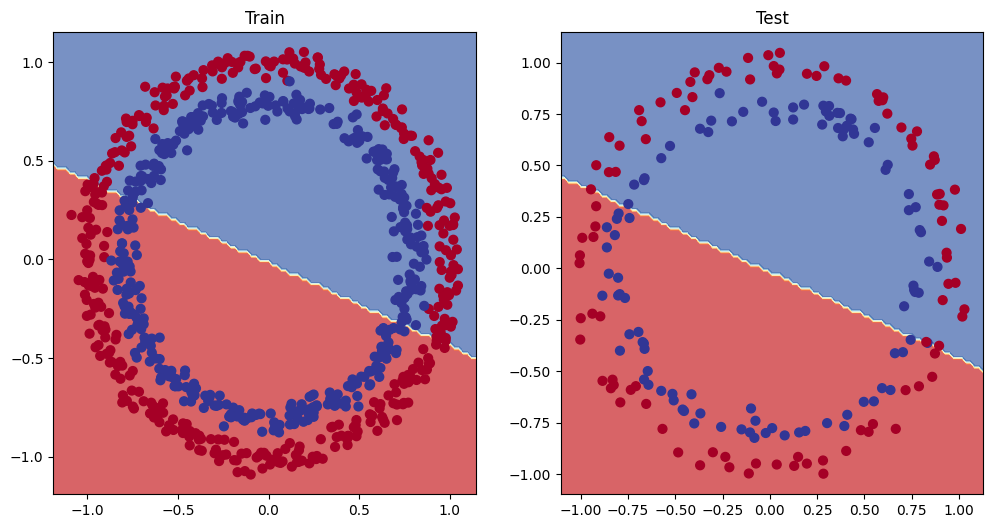

In [ ]:
import matplotlib.pyplot as plt
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, torch.from_numpy(X_train), y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, torch.from_numpy(X_test), y_test)

In [ ]:
weight = 0.7
bias = 0.2
start = 0
end = 3
step = 0.01

x_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * x_regression + bias

print(len(x_regression))


300


In [ ]:
train_split = int(0.8 * len(x_regression))
x_train_regression, y_train_regression = x_regression[:train_split], y_regression[:train_split]
x_test_regression, y_test_regression = x_regression[train_split:], y_regression[train_split:]


In [ ]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)


In [ ]:
torch.manual_seed(42)

epochs = 1000

x_train_regression, y_train_regression = x_train_regression.to(device), y_train_regression.to(device)
x_test_regression, y_test_regression = x_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  y_pred = model_2(x_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(x_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.92996 | Test loss: 1.67407
Epoch: 100 | Loss: 0.02746 | Test loss: 0.14771
Epoch: 200 | Loss: 0.02585 | Test loss: 0.14510
Epoch: 300 | Loss: 0.02408 | Test loss: 0.14358
Epoch: 400 | Loss: 0.02927 | Test loss: 0.13094
Epoch: 500 | Loss: 0.02050 | Test loss: 0.14296
Epoch: 600 | Loss: 0.04969 | Test loss: 0.08893
Epoch: 700 | Loss: 0.01718 | Test loss: 0.14347
Epoch: 800 | Loss: 0.03517 | Test loss: 0.10921
Epoch: 900 | Loss: 0.01832 | Test loss: 0.13610


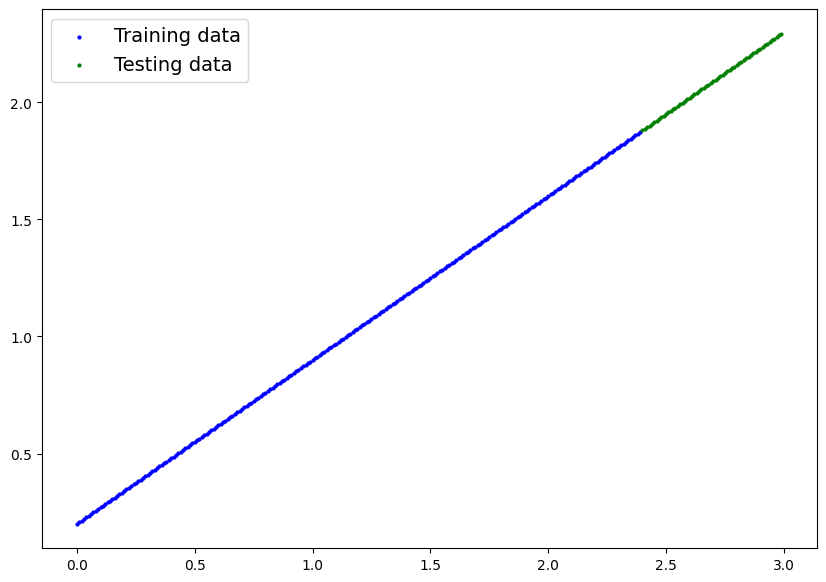

In [ ]:
model_2.eval()

with torch.inference_mode():
  y_preds = model_2(x_test_regression)

plot_predictions(train_data=x_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data = x_test_regression.cpu(),
                 test_labels = y_test_regression.cpu()
                 )

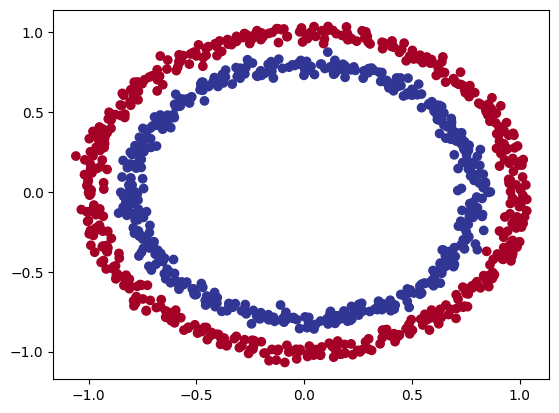

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42
)
plt.scatter(x[:,0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);


In [ ]:
import torch
from sklearn.model_selection import train_test_split

x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)


In [ ]:
device="cpu"

In [ ]:
x_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=50)
    self.layer_2 = nn.Linear(in_features=50, out_features=50)
    self.layer_3 = nn.Linear(in_features=50, out_features=1)
    self.relu = nn.LeakyReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=50, bias=True)
  (layer_2): Linear(in_features=50, out_features=50, bias=True)
  (layer_3): Linear(in_features=50, out_features=1, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69710, Accuracy: 50.00% | Test Loss: 0.69417, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.68080, Accuracy: 65.38% | Test Loss: 0.68069, Test Accuracy: 67.50%
Epoch: 200 | Loss: 0.66052, Accuracy: 84.75% | Test Loss: 0.66306, Test Accuracy: 86.50%
Epoch: 300 | Loss: 0.61145, Accuracy: 96.12% | Test Loss: 0.62082, Test Accuracy: 93.50%
Epoch: 400 | Loss: 0.49867, Accuracy: 99.62% | Test Loss: 0.52341, Test Accuracy: 98.00%
Epoch: 500 | Loss: 0.31688, Accuracy: 99.75% | Test Loss: 0.35592, Test Accuracy: 98.50%
Epoch: 600 | Loss: 0.16884, Accuracy: 99.88% | Test Loss: 0.20940, Test Accuracy: 100.00%
Epoch: 700 | Loss: 0.09437, Accuracy: 100.00% | Test Loss: 0.13071, Test Accuracy: 100.00%
Epoch: 800 | Loss: 0.05995, Accuracy: 100.00% | Test Loss: 0.09151, Test Accuracy: 100.00%
Epoch: 900 | Loss: 0.04219, Accuracy: 100.00% | Test Loss: 0.06953, Test Accuracy: 100.00%


In [ ]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(x_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

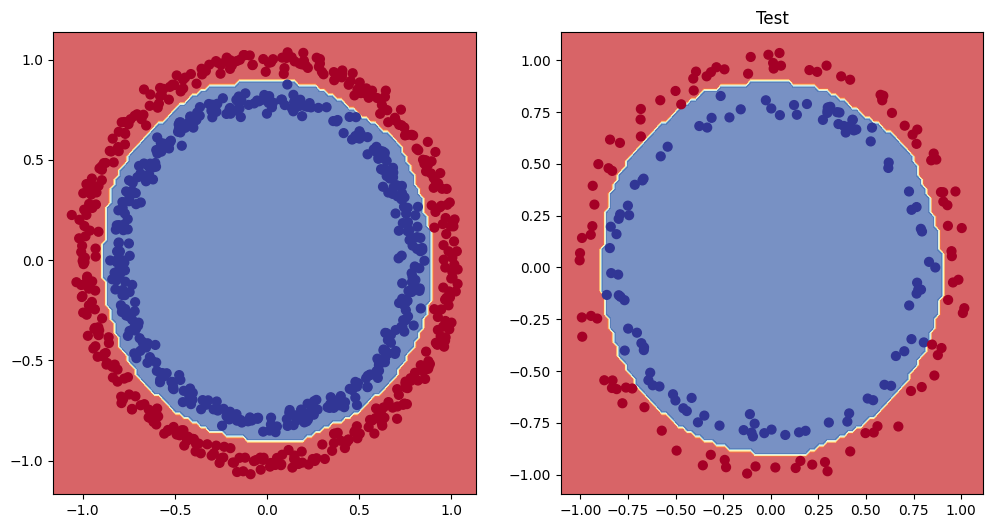

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_3, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, x_test, y_test)

In [ ]:
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

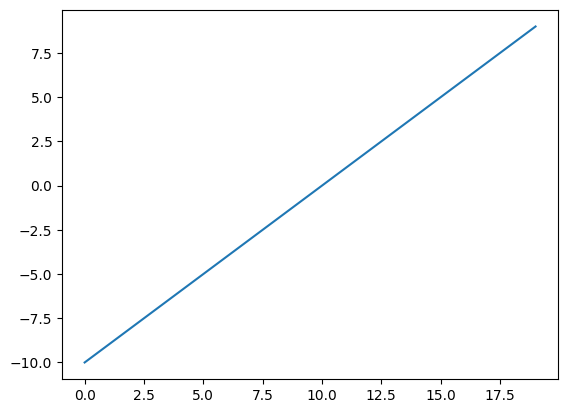

In [ ]:
plt.plot(A)

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

aLkSuFhAlIwEuFaSkJdFaIwUeFhLaKsJfHaWrUlFhAlEiRgAwLrIgWeLiFu


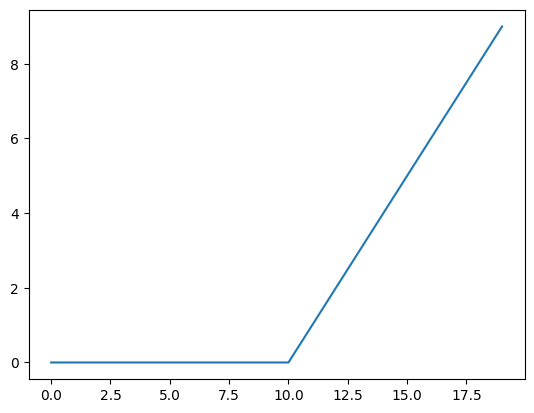

In [ ]:
plt.plot(relu(A))

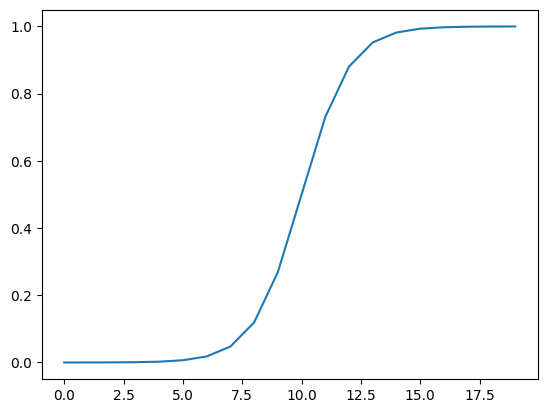

In [ ]:

plt.plot(torch.sigmoid(A))

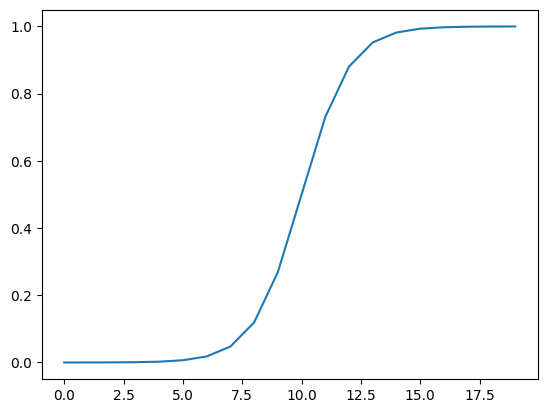

In [ ]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))
plt.plot(sigmoid(A))